# Q1

## Importing the libraries

In [2]:
from scipy.io import loadmat
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

## Loading the data

In [3]:
df = loadmat("Assignment_4/Code&Data/Abalone.mat")

In [4]:
labels = df['label_vector']  # labels = age values
data = df['instance_matrix'].toarray()  #input features

## Splitting the data into train, test and validation sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.5, random_state=12)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.4, random_state=12)

In [6]:
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 2088
Validation set size: 836
Test set size: 1253


## Linear Regression

### Using Linear regression to predict the values of age

In [7]:
# Create a Linear Regression model and fit it to the training set
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Compute the mean squared error on the training, validation, and test sets
train_mse = mean_squared_error(y_train, lin_reg.predict(X_train))
val_mse = mean_squared_error(y_val, lin_reg.predict(X_val))
test_mse = mean_squared_error(y_test, lin_reg.predict(X_test))

print(f"Train Mean Squared Error: {train_mse}")
print(f"Validation Mean Squared Error: {val_mse}")
print(f"Test Mean Squared Error: {test_mse}")

Train Mean Squared Error: 4.983894728391374
Validation Mean Squared Error: 4.659591750879813
Test Mean Squared Error: 4.746460479684803


In [8]:
print(f"Test Mean Squared Error: {mean_squared_error(y_test, lin_reg.predict(X_test))}")

Test Mean Squared Error: 4.746460479684803


## Ridge Regression

### Using Ridge regression to predict the values of age

In [9]:
# Create an empty list to store validation MSE for different alpha values
val_mse = []

# Create empty lists to store all alpha values and beta coefficients for different alpha values
all_alphas = []
beta_coefficients = []

# Set the starting value of alpha as 10^(-4)
alpha = 10 ** (-4)

# Iterating until alpha reaches 10^5
while alpha < 10 ** 5:
    # Append the current alpha value to the list of all alpha values
    all_alphas.append(alpha)

    # Create a Ridge model with the current alpha value, fit it to the training set, and record the beta coefficients
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    beta_coefficients.append(ridge_reg.coef_)

    # Record the validation MSE for the current alpha value
    val_mse.append([alpha, mean_squared_error(y_val, ridge_reg.predict(X_val))])

    # Increase alpha by a factor of 10 for the next iteration
    alpha *= 10


### Display the list of validation MSE values for different alpha values

In [10]:
# Sort the list of validation MSE values for different alpha values by increasing MSE
sorted_val_mse = sorted(val_mse, key=lambda x: x[1])

# Display the sorted list of validation MSE values
for alpha, mse in sorted_val_mse:
    print(f"Alpha: {alpha:.4f}, Validation MSE: {mse:.4f}")


Alpha: 0.1000, Validation MSE: 4.6581
Alpha: 0.0100, Validation MSE: 4.6593
Alpha: 0.0010, Validation MSE: 4.6596
Alpha: 0.0001, Validation MSE: 4.6596
Alpha: 1.0000, Validation MSE: 4.7138
Alpha: 10.0000, Validation MSE: 5.4965
Alpha: 100.0000, Validation MSE: 6.7964
Alpha: 1000.0000, Validation MSE: 8.0063
Alpha: 10000.0000, Validation MSE: 10.0722


### Display the list of beta coefficients for each feature

In [11]:
# Create a Ridge model with the alpha value that resulted in the lowest validation MSE and fit it to the training set
best_alpha = sorted_val_mse[0][0]
ridge_reg = Ridge(alpha=best_alpha)
ridge_reg.fit(X_train, y_train)

# Compute the mean squared error on the test set using the Ridge model with the best alpha value
test_mse = mean_squared_error(y_test, ridge_reg.predict(X_test))
print(f"Test Mean Squared Error for alpha = {best_alpha:.4f}:{test_mse:.4f}")


Test Mean Squared Error for alpha = 0.1000:4.7465


### Plot the beta coefficients for each feature as a function of the alpha value

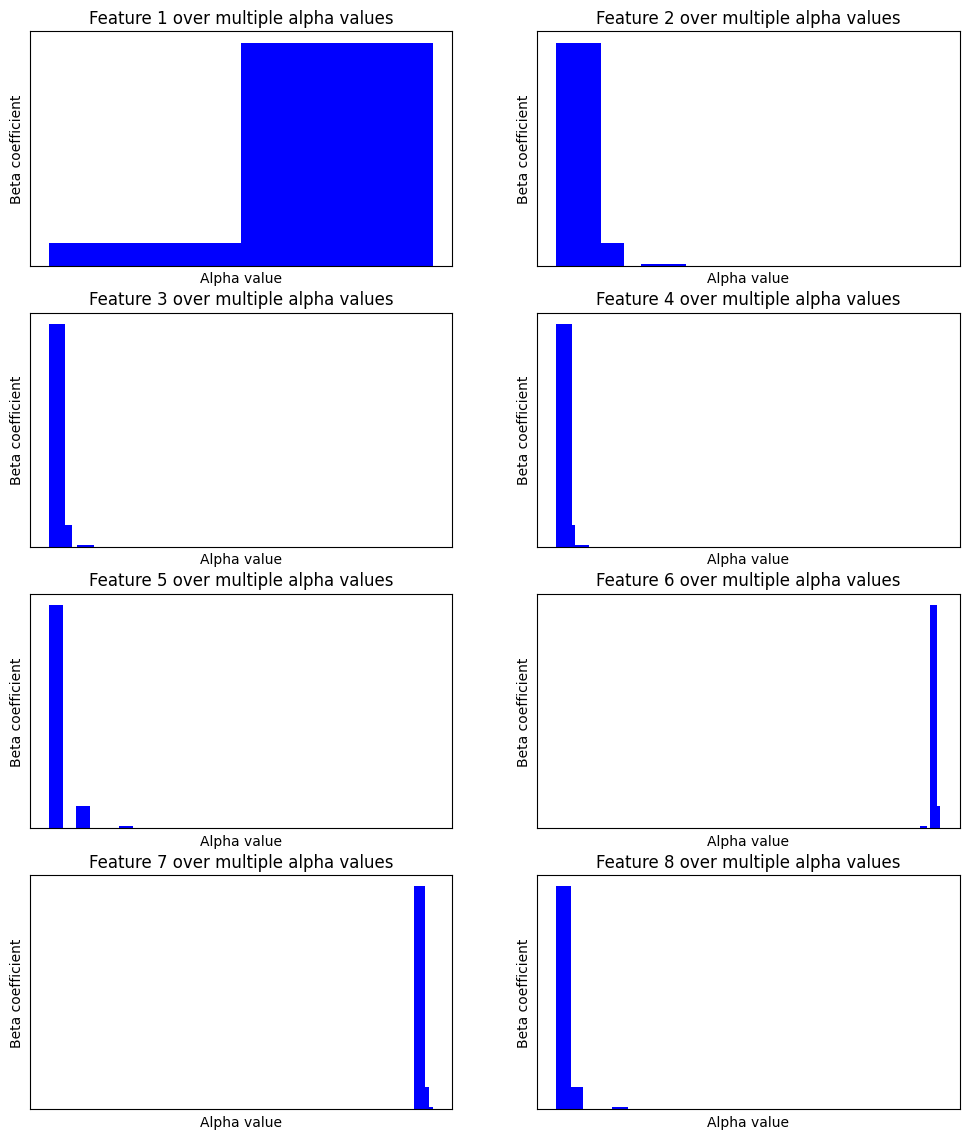

In [12]:
# Create a bar plot to visualize how the beta coefficients vary with different alpha values
# Set the figure size
plt.figure(figsize=(12, 14))

# Iterate over the first 8 features and plot the corresponding beta coefficients for each alpha value
for i in range(8):
    # Create a subplot for each feature
    plt.subplot(4, 2, i + 1)
    # Extract the beta coefficients for the current feature
    beta_i = [beta[0][i] for beta in beta_coefficients]
    # Plot the beta coefficients for the current feature as a function of the alpha value
    plt.bar(beta_i, all_alphas, color='blue', width=0.4)

    # Set the x and y labels, title, and ticks
    plt.xlabel("Alpha value")
    plt.ylabel("Beta coefficient")
    plt.title(f"Feature {i+1} over multiple alpha values")
    plt.xticks(())
    plt.yticks(())

plt.show()